# Team members
- Xuzhu Chen A20385468 xchen168@hawk.iit.edu
- Yuanli Zhang A20339554 yzhan276@hawk.iit.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

df = pd.read_csv('Crime Prediction Data/communities-crime-clean.csv',na_values=["?"])

# Get the meaningful attributes
attributes = df.iloc[:,3:103]
attributes = attributes.apply(pd.to_numeric, errors='ignore') # Make sure the attributes are numeric
attributes = attributes.fillna(value=0) # replace NaN with 0

# Get the tragets
df['HighCrime'] = pd.cut(df['ViolentCrimesPerPop'],
                         [0.0,0.1,1.0],
                         include_lowest=True,
                         labels=[0,1])
tragets = df['HighCrime']

## Get the percentage of positive and negative instances in the dataset

In [2]:
print("Percentage of High Crime:",
      100*tragets.where(tragets==1).count()/tragets.count(),"%")
print("Percentage of Low Crime:",
      100*tragets.where(tragets==0).count()/tragets.count(),"%")

Percentage of High Crime: 62.7195183141 %
Percentage of Low Crime: 37.2804816859 %


# Dicision Tree
## 1. Get training accuracy, precision, and recall
The maximum depth of the decision tree is set to 5. In order to reduce overfitting.

In [3]:
# Classify Clean data with Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

# Create a Decision Tree module with maximum depth of five
DT = DecisionTreeClassifier(random_state=0,max_depth=5)
DT_entire_tran = DT.fit(attributes,tragets)
DT_entire_pred = DT_entire_tran.predict(attributes)
# Get training Accuracy, precision, recall
print("Accuracy: %.5f" % metrics.accuracy_score(tragets,DT_entire_pred))
print("Precision: %.5f" % metrics.precision_score(tragets,DT_entire_pred))
print("Recall: %.5f" % metrics.recall_score(tragets,DT_entire_pred))

Accuracy: 0.87205
Precision: 0.90153
Recall: 0.89360


## 2. Get main features for classification


10 most important features:


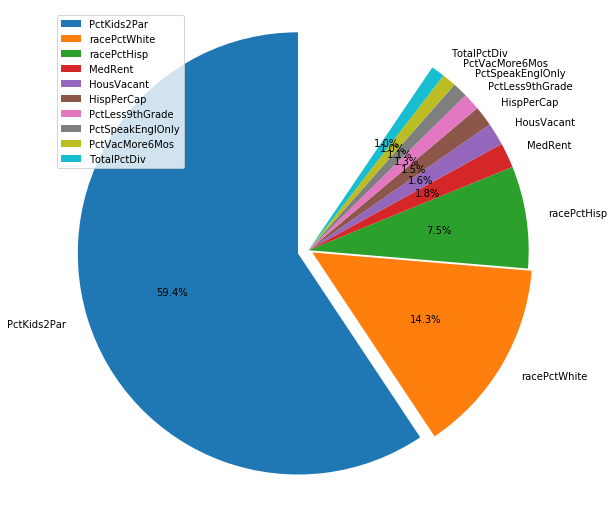

In [4]:
# Get main features of trained decision tree
importances = DT_entire_tran.feature_importances_
indices = np.argsort(importances)[::-1]
labels = attributes.axes[1]

# Get the graph
print("\n10 most important features:")
importances = importances[indices[0:10]]
labels = labels[indices[0:10]]
explode = [0.05,0.02,0,0,0,
          0,0,0,0,0]
plt.figure(figsize=(9,9))
patches,l_text,p_text = plt.pie(importances,explode=explode,labels=labels,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
plt.axis('equal')
plt.legend()
plt.show()

### Description of plot:
The pie chart above shows the information gain for the 10 most important features in percentage form.

According to the pie chart, we can easily see that the ten most important features used for decision tree classifier are *PctKids2Par, racePctWhite, racePctHisp, MedRent, HousVacant, HispPerCap, PctLess9thGrade, PctSpeakEnglOnly, PctVacMore6Mos, TotalPctDiv*.
### Explanation:
We calculate the information gain of each feature and sort them in decreasing order, then we pick top 10 features. It makes sense because of the more information gain, the more important of this feature. The top 10 main features have higher information gain than other features’ information gain. So these ten features are the main features used for classification. 

## 3. Get accuracy, precision, and recall for 10-fold CV

In [5]:
# Classify with Decision Trees via 10-fold cross-validation
DT_acc = cross_val_score(DT,attributes,tragets,
                         cv=10,scoring='accuracy')
DT_per = cross_val_score(DT,attributes,tragets,
                         cv=10,scoring='average_precision')
DT_rcal = cross_val_score(DT,attributes,tragets,
                          cv=10,scoring='recall')
print("\t\t Mean \t\t Standard deviation")
print("Accuracy\t %.5f \t %.5f" % (DT_acc.mean(),DT_acc.std()))
print("Precision\t %.5f \t %.5f" % (DT_per.mean(),DT_per.std()))
print("Recall\t\t %.5f \t %.5f" % (DT_rcal.mean(),DT_rcal.std()))

		 Mean 		 Standard deviation
Accuracy	 0.77869 	 0.04432
Precision	 0.78568 	 0.11762
Recall		 0.82160 	 0.10650


## 4. Why are they different from the previous result? 
### Description of plot:
Comparing with testing on the training data, we get a little lower accuracy, lower precision, and lower recall when we use 10-fold cross validation. 
### Explanation:
When we test on the training data, all observations are used for both training and test. A major issue with such kind of decision trees is that they can be built to fit the training data "too perfectly", which will cause *overfitting*. Thus, the accuracy, precision, and recall on the training data will be high.

When we use 10-fold cross validation, the whole dataset is divided into 10 subsets, each time we use 9 of the subset for training and the remaining one subset for testing. Thus, the training set and the testing set are different, the trees are *not overfitting* on the test data. And it is likely to get a lower evaluation result.

Therefore, the difference is caused by *overfitting* when we test on the training data.

# Gaussian Naive Bayes
## 1. Get accuracy, precision, and recall for 10-fold CV

In [6]:
# Classify with Gaussian Naive Bayes via 10-fold cross-validation
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GaussianNB(priors=None)
GNB_acc = cross_val_score(GNB,attributes,tragets,
                          cv=10,scoring='accuracy')
GNB_per = cross_val_score(GNB,attributes,tragets,
                          cv=10,scoring='average_precision')
GNB_rcal = cross_val_score(GNB,attributes,tragets,
                           cv=10,scoring='recall')
print("\t\t Mean \t\t Standard deviation")
print("Accuracy\t %.5f \t %.5f" % (GNB_acc.mean(),GNB_acc.std()))
print("Precision\t %.5f \t %.5f" % (GNB_per.mean(),GNB_per.std()))
print("Recall\t\t %.5f \t %.5f" % (GNB_rcal.mean(),GNB_rcal.std()))

		 Mean 		 Standard deviation
Accuracy	 0.76161 	 0.05424
Precision	 0.91917 	 0.03974
Recall		 0.69200 	 0.09130


## 2. Get 10 most predictive features


10 most predictive features:


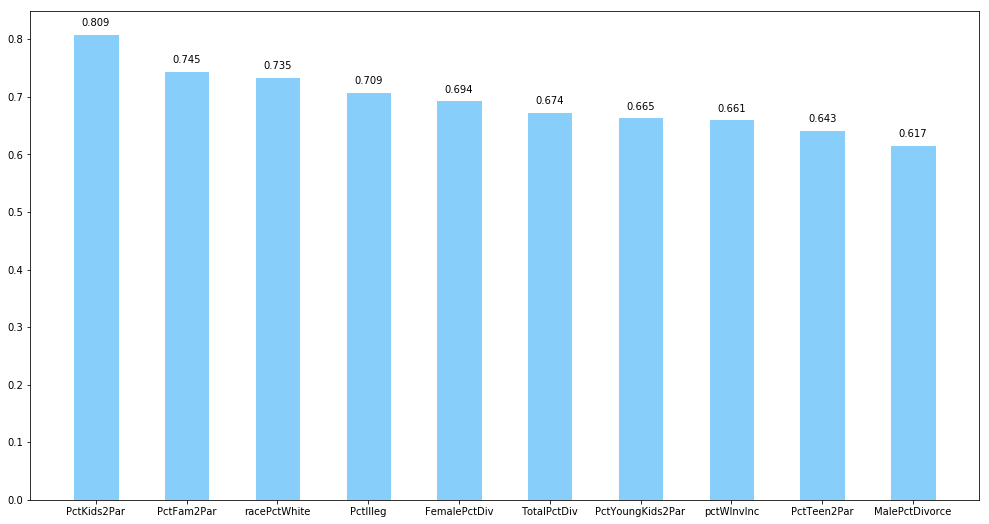

In [7]:
# 10 Most important features base on mean & variance
HighCrime_X = attributes[df.HighCrime == 0]
LowCrime_X = attributes[df.HighCrime == 1]
NAD_Means = np.abs(HighCrime_X.mean() - LowCrime_X.mean())/(HighCrime_X.std() + LowCrime_X.std())
indices = np.argsort(NAD_Means)[::-1]
labels = attributes.axes[1]

# Get the graph
print("\n10 most predictive features:")
importances = NAD_Means[indices[0:10]]
labels = labels[indices[0:10]]

plt.figure(figsize=(17,9))
X = np.arange(0,20,2)

plt.bar(X,importances,width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
for x,importances in zip(X,importances):
    plt.text(x, importances+0.01, '%.3f' % importances, ha='center', va= 'bottom')
plt.xticks(X, labels)
plt.show()

### Description of plot
The pie chart above shows the information gain for the 10 most predictive features in percentage form.

The ten most predictive features are PctKids2Par, PctFam2Par, racePctWhite, Pctllleg, FemalePctDiv, TotalPctDiv, PctYountKids2Par, pctWInvInc, PctTeen2Par, and MalePctDivorce. 
 
### Explanation

These ten most predictive features are measured by the normalized absolute difference of means for the feature between the two classes. The features follow Gaussian Distribution. We can use the curve of probability distribution function to analyze this problem. So we need to consider the following situations. 

1. If standard deviations of two classes are both small, the curve is sharp and it has a high peak. In this case, if the absolute value of the difference of means is large, the overlap of these two curves(Class = T, Class = F) will be pretty small which we can ignore. So the majority of data is useful for training. If the absolute value of the difference of means is small, the overlap area will become larger. So, the data which located in overlap area is useless. Therefore, with the larger absolute difference of means for the features between the two classes, the feature is more predictive. 

2. If standard deviations of two classes are both large, the curve will be a gentle slope. There will exist big overlap area when the absolute value of the difference of means is not so big. So, the majority of data is useless for training.

3. If one of the standard deviations of two classes is small and another is large. When the absolute value of the difference of means is large enough, data still can be useful.

4. If the absolute value of the difference of means of two classes is not change, if the sum of standard deviations of two classes is pretty small, then the normalized absolute difference of means for the feature between the two classes will be large. In this case, the overlap area of two curves will be very small. So, in this case, data can be useful.

Above all, as long as the sum of standard deviations of two classes to be small enough or the absolute value of the difference of means for the feature between the two classes to be large enough, the normalized absolute difference of means for the feature between the two classes will be large. Therefore, the corresponding feature will be a key feature. 

## 3. How do these results compare with your results from decision trees, above
### Description of phenomenon
Both the accuracy and recall are lower a bit, but the precision is highter.
### Explanation
In Gaussian Naive Bayes classifier, the larger normalized absolute difference of means for the feature between the two classes means the corresponding feature is more important. However, this feature may give us small information gain. So it might not be the key feature in decision tree classifier.

Because of the difference of key festures between decision tree and Gaussian naive bayes, it is possible that the true positive and false negative increase, the number of false positive decreases. And it will result in a smaller recall, larger accuracy, and larger precision.

# Linear Support Vector Machine
## 1. Get accuracy, precision, and recall for 10-fold CV

In [8]:
# Linear Support Vector Machine
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC_acc = cross_val_score(LSVC,attributes,tragets,
                           cv=10,scoring='accuracy')
LSVC_per = cross_val_score(LSVC,attributes,tragets,
                           cv=10,scoring='average_precision')
LSVC_rcal = cross_val_score(LSVC,attributes,tragets,
                            cv=10,scoring='recall')
print("\t\t Mean \t\t Standard deviation")
print("Accuracy\t %.5f \t %.5f" % (LSVC_acc.mean(),LSVC_acc.std()))
print("Precision\t %.5f \t %.5f" % (LSVC_per.mean(),LSVC_per.std()))
print("Recall\t\t %.5f \t %.5f" % (LSVC_rcal.mean(),LSVC_rcal.std()))

		 Mean 		 Standard deviation
Accuracy	 0.79623 	 0.05469
Precision	 0.93855 	 0.02947
Recall		 0.83440 	 0.11648


## 2. Get 10 most predictive features


10 most predictive features:


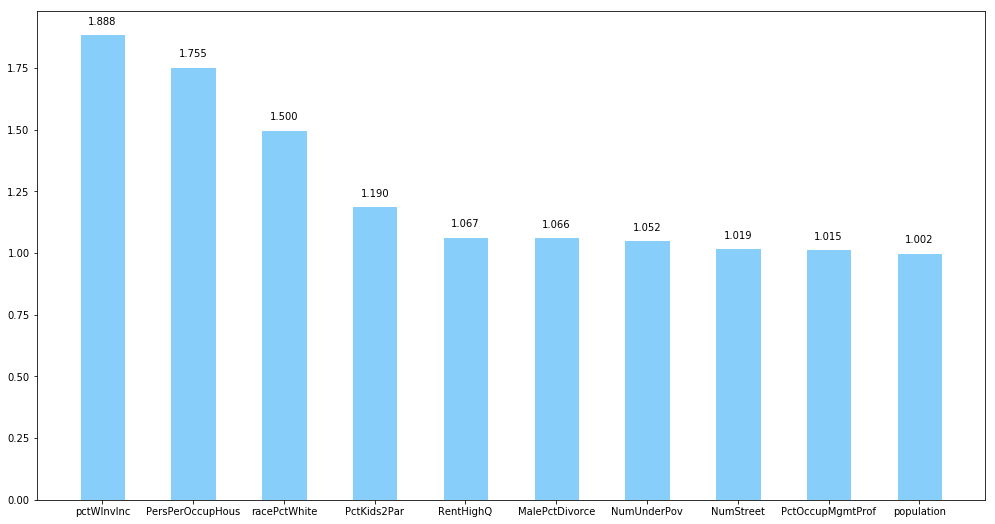

In [9]:
# 10 most predictive features 
LSVC_model = LSVC.fit(attributes,tragets)
LSVC_coef = np.abs(LSVC_model.coef_)[0]
indices = np.argsort(LSVC_coef)[::-1]

# Get the graph
print("\n10 most predictive features:")
LSVC_coef = LSVC_coef[indices[0:10]]
labels = attributes.axes[1][indices[0:10]]

plt.figure(figsize=(17,9))
X = np.arange(0,20,2)

plt.bar(X,LSVC_coef,width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
for x,LSVC_coef in zip(X,LSVC_coef):
    plt.text(x, LSVC_coef+0.03, '%.3f' % LSVC_coef, ha='center', va= 'bottom')
plt.xticks(X, labels)
plt.show()

### Description of plot
The 10 most predictive features are pctWInvInc, PersPerOccupHous, racePctWhite, PctKids2Par, RentHighQ, MalePctDivorce, NumStreet, PctOccupMgmtProf, and population.

### Explanation 
In linear support vector machine, if the weight of a feature is far away from 0, no matter it is negative or positive, this feature is important for a model. If a weight of a feature is close to 0, it means this feature is not important for this model. 

Therefore, we calculate the absolute value of weight for every feature and sort them in decreasing order, then we pick top 10 values. These ten values are far away from 0, so the corresponding features are most predictive features.
 
## 3. How do these results compare with your results from decision trees, above?
 We get higher accuracy, higher precision, and higher recall using linear support vector machine. 
 
 The results changes because linear support vector considers all features for each estimate
circulation, while decision tree picks one feature each time. 

# Linear Regression
## 1. Get mean-square-error for 10-fold CV

In [45]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ViolentCrimesPerPop = df['ViolentCrimesPerPop']
LR = LinearRegression()
LR_mse = cross_val_score(LR,attributes,ViolentCrimesPerPop,
                         cv=10,scoring='neg_mean_squared_error')
print("\nMean-squared-error for 10-fold cross-validation:",np.abs(LR_mse).mean())


Mean-squared-error for 10-fold cross-validation: 0.0200939693044


## 2. Get mean-square-error on training set

In [11]:
LR_train = LR.fit(attributes,ViolentCrimesPerPop)
LR_predict = LR_train.predict(attributes)
print("Mean-squared-error on training set: ",
      mean_squared_error(y_true=ViolentCrimesPerPop,
                         y_pred=LR_predict))

Mean-squared-error on training set:  0.0165167748803


## 3. Most predictive features for high crime rate

Number of features: 52

Ten most predictive features for High Crime:


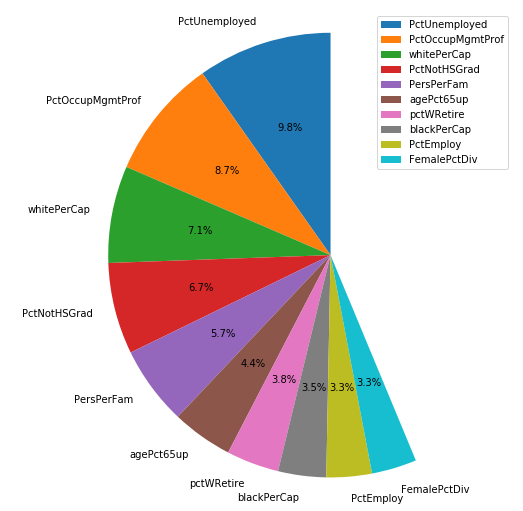

In [12]:
# Get attributes contribute to High Crime
LR_coef = LR_train.coef_
LR_coef = LR_coef[LR_coef>0]
indices = np.argsort(LR_coef)[::-1]
print("Number of features:",LR_coef.size)
# Get the graph
print("\nTen most predictive features for High Crime:")
sum = LR_coef.sum()
LR_coef = LR_coef[indices[0:10]]/sum
labels = attributes.axes[1][indices[0:10]]
plt.figure(figsize=(9,9))
patches,l_text,p_text = plt.pie(LR_coef,labels=labels,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
plt.axis('equal')
plt.legend()
plt.show()

The ten most predictive features of a high crime rate are PctEmplManu, pctWpubAsst, numbUrban, medFanmInc, MalePctNevMarr, racePctHisp, PctEmploy, FemalePctDiv, racePctWhite, and NumUnderPov. 

## 4. Most predictive features for low crime rate

Number of features: 48

Ten most predictive features for Low Crime:


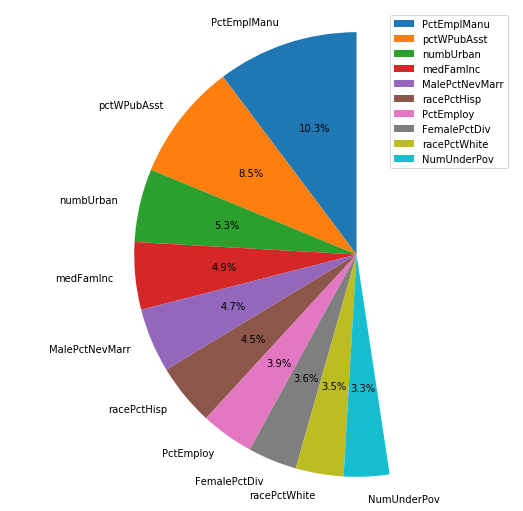

In [13]:
# Get attributes contribute to Low Crime
LR_coef = LR_train.coef_
LR_coef = np.abs(LR_coef[LR_coef<0])
indices = np.argsort(LR_coef)[::-1]
print("Number of features:",LR_coef.size)
# Get the graph
print("\nTen most predictive features for Low Crime:")
sum = LR_coef.sum()
LR_coef = LR_coef[indices[0:10]]/sum
labels = attributes.axes[1][indices[0:10]]
plt.figure(figsize=(9,9))
patches,l_text,p_text = plt.pie(LR_coef,labels=labels,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
plt.axis('equal')
plt.legend()
plt.show()



The ten most predictive features of a low crime rate are PctUnemployed, PctOccupMgmtProf, whitePerCap, PctNotHSGrad, PersPerFam, agePct65up, pctWretire, blackPerCap, PctEmploy, and FemalePctDive. 

# Ridge Regression
## 1. Get mean-square-error for 10-fold CV

In [44]:
# Ridge Regression
from sklearn.linear_model import RidgeCV
RCV = RidgeCV(alphas=[0.001,0.01,0.1,1.0,10.0],
              scoring='neg_mean_squared_error',
              store_cv_values=True)
# 10-fold CV
RCV_mse = cross_val_score(RCV,attributes,ViolentCrimesPerPop,
                         cv=10,scoring='neg_mean_squared_error')
print("\nMean-squared-error for 10-fold cross-validation with best alpha:",
      np.abs(RCV_mse).mean())


Mean-squared-error for 10-fold cross-validation with best alpha: 0.0197950213482


## 2. Get mean-square-error on training set

In [43]:
# Test on training set
RCV_train = RCV.fit(attributes,ViolentCrimesPerPop)
RCV_predict = RCV_train.predict(attributes)
print("Mean-squared-error on training set with best alpha: ",
      mean_squared_error(y_true=ViolentCrimesPerPop,
                         y_pred=RCV_predict))

Mean-squared-error on training set with best alpha:  0.0167635291552


## 3. Get the best alpha

In [16]:
print("The best alpha:",RCV_train.alpha_)

The best alpha: 1.0


## 4. What does this say about the amount of overfitting in linear regression for this problem?
 
In linear ridge regression, the larger the value of alpha, the greater the amount of shrinkage. That means the corresponding coefficient are shrinking toward zero when alpha is larger. We allow our model to shrink to include fewer variables, which makes interpretable and less likely that we overfit the data. In this problem, there are 5 alphas corresponding 5 different linear ridge regression models. We first fit a model using training data, then we use test data to test our model. Next, the RidgeCV will find the model with the smallest MSE, which has alpha 1.0. So, the best alpha is 1.0.

# Quadratic Polynomial Regression
## 1. Get mean-square-error for 10-fold CV

In [17]:
# Quadratic polynomial regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
QPR = make_pipeline(PolynomialFeatures(2), Ridge())

QPR_mse = cross_val_score(QPR,attributes,ViolentCrimesPerPop,
                         cv=10,scoring='neg_mean_squared_error')
print("\nMean-squared-error for 10-fold cross-validation:",
      np.abs(QPR_mse).mean())


Mean-squared-error for 10-fold cross-validation: 0.0243686889952


## 2. Get mean-square-error on training set

In [18]:
QPR_train = QPR.fit(attributes,ViolentCrimesPerPop)
QPR_predict = QPR_train.predict(attributes)
print("Mean-squared-error on training set: ",
      mean_squared_error(y_true=ViolentCrimesPerPop,
                         y_pred=QPR_predict))

Mean-squared-error on training set:  0.00799801374521


## 3. Does this mean the quadratic model is better than the linear model for this problem?

No. When we add second order term, the MSE of 10-fold cross validation increases 23%. The MSE on the training set narrows 20 times. Thus, adding quadratic model will cause overfitting. The linear model is better than the quadratic model. 

# Dirty data for Decision Tree

## 1. Get accuracy, precision, and recall for 10-fold CV
### We use mean value of a column which has missing value to replace the missing values of that column.

In [19]:
# Classify Full Data with Decision Trees via 10-fold cross-validation
from sklearn.preprocessing import Imputer

Full_df = pd.read_csv('Crime Prediction Data/communities-crime-full.csv',na_values=["?"])
Full_tragets = pd.cut(Full_df['ViolentCrimesPerPop'],
                               [0.0,0.1,1.0],
                               include_lowest=True,
                               labels=[0,1])
Full_attributes = Full_df.iloc[:,5:127]

# Impute the missing values with mean value of each columns
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(Full_attributes)
Full_attributes = imp.transform(Full_attributes)

# Do 10-fold CV on decision tree of which maximum depth is 5
DT = DecisionTreeClassifier(random_state=0,max_depth=5)
DT_acc = cross_val_score(DT,Full_attributes,Full_tragets,
                         cv=10,scoring='accuracy')
DT_per = cross_val_score(DT,Full_attributes,Full_tragets,
                         cv=10,scoring='average_precision')
DT_rcal = cross_val_score(DT,Full_attributes,Full_tragets,
                          cv=10,scoring='recall')
print("\t\t Mean \t\t Standard deviation")
print("Accuracy\t %.5f \t %.5f" % (DT_acc.mean(),DT_acc.std()))
print("Precision\t %.5f \t %.5f" % (DT_per.mean(),DT_per.std()))
print("Recall\t\t %.5f \t %.5f" % (DT_rcal.mean(),DT_rcal.std()))

		 Mean 		 Standard deviation
Accuracy	 0.78581 	 0.02628
Precision	 0.80200 	 0.12071
Recall		 0.81451 	 0.03387


The accuracy for the full data are 0.8% higher than the clean data;
The precision for the full data are 2% higher than the clean data;
The recall for the full data are 0.8% higher than the clean data
Thus, the CV results are slightly better.

## 2. Effect of missing values


In [20]:
DT = DecisionTreeClassifier(random_state=0,max_depth=5)
Full_tran = DT.fit(Full_attributes,Full_tragets)
Full_importances = Full_tran.feature_importances_
Full_indices = np.argsort(Full_importances)[::-1]
Full_labels = Full_df.iloc[:,5:127].axes[1]
Full_labels = Full_labels[Full_indices[20:30]]

DT_tran = DT.fit(attributes,tragets)
importances = DT_tran.feature_importances_
indices = np.argsort(importances)[::-1]
labels = attributes.axes[1]
importances = importances[indices[20:30]]
labels = labels[indices[20:30]]

index = range(20,30)
print("important range\t Clean data \t Full data")
for i in index:
    print(i,"\t\t",labels[i-20]," \t",Full_labels[i-20])

important range	 Clean data 	 Full data
20 		 FemalePctDiv  	 FemalePctDiv
21 		 population  	 population
22 		 PopDens  	 PopDens
23 		 agePct65up  	 pctWInvInc
24 		 PctPopUnderPov  	 LemasSwFTFieldPerPop
25 		 PctEmplProfServ  	 PctOccupManu
26 		 PctBSorMore  	 NumUnderPov
27 		 PctUnemployed  	 PctPopUnderPov
28 		 PctEmploy  	 PctUsePubTrans
29 		 PctEmplManu  	 PctBSorMore


The average accuracy and average precision of full data are a little higher than the average accuracy and average precision of clean data, but the average recall of dirty data is a little lower than the average recall of clean data.

We get better CV results using dirty data. In dirty data, there are 20 more columns than in clean data. The predictive features in range 20 - 30 changes. Therefore, we get a slightly better result. 
# Team work
## 1. Random Forest
Get accuracy, precision, and recall for 10-fold CV

We estimate 10 random trees in the forest, and the maximum depth of each tree is 5.

In [21]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10, max_depth=5,
    min_samples_split=2, random_state=0)

# 10-fold cross-validation on Full data
RFC_acc = cross_val_score(RFC,Full_attributes,Full_tragets,
                         cv=10,scoring='accuracy')
RFC_per = cross_val_score(RFC,Full_attributes,Full_tragets,
                         cv=10,scoring='average_precision')
RFC_rcal = cross_val_score(RFC,Full_attributes,Full_tragets,
                          cv=10,scoring='recall')
print("Full Data\n\t\t Mean \t\t Standard deviation")
print("Accuracy\t %.5f \t %.5f" % (RFC_acc.mean(),RFC_acc.std()))
print("Precision\t %.5f \t %.5f" % (RFC_per.mean(),RFC_per.std()))
print("Recall\t\t %.5f \t %.5f" % (RFC_rcal.mean(),RFC_rcal.std()))

# 10-fold cross-validation on Clean data
RFC_acc = cross_val_score(RFC,attributes,tragets,
                         cv=10,scoring='accuracy')
RFC_per = cross_val_score(RFC,attributes,tragets,
                         cv=10,scoring='average_precision')
RFC_rcal = cross_val_score(RFC,attributes,tragets,
                          cv=10,scoring='recall')
print("\nClean Data\n\t\t Mean \t\t Standard deviation")
print("Accuracy\t %.5f \t %.5f" % (RFC_acc.mean(),RFC_acc.std()))
print("Precision\t %.5f \t %.5f" % (RFC_per.mean(),RFC_per.std()))
print("Recall\t\t %.5f \t %.5f" % (RFC_rcal.mean(),RFC_rcal.std()))

Full Data
		 Mean 		 Standard deviation
Accuracy	 0.82196 	 0.01325
Precision	 0.94544 	 0.00746
Recall		 0.86492 	 0.02180

Clean Data
		 Mean 		 Standard deviation
Accuracy	 0.82032 	 0.04449
Precision	 0.94064 	 0.02347
Recall		 0.86480 	 0.09054


## 2. Kernel Support vector machine
Get accuracy, precision, and recall for 10-fold CV

We use rbf function as kernel, it might take some seconds.

In [22]:
# Kernel SVM
from sklearn import svm
KSVM = svm.SVC(kernel='rbf', gamma=2)

# 10-fold cross-validation on Full data
KSVM_acc = cross_val_score(KSVM,Full_attributes,Full_tragets,
                         cv=10,scoring='accuracy')
KSVM_per = cross_val_score(KSVM,Full_attributes,Full_tragets,
                         cv=10,scoring='average_precision')
KSVM_rcal = cross_val_score(KSVM,Full_attributes,Full_tragets,
                          cv=10,scoring='recall')
print("Full Data\n","Mean \t\t Standard deviation")
print(KSVM_acc.mean(),"\t",KSVM_acc.std())
print(KSVM_per.mean(),"\t",KSVM_per.std())
print(KSVM_rcal.mean(),"\t",KSVM_rcal.std())

# 10-fold cross-validation on Clean data
KSVM_acc = cross_val_score(KSVM,attributes,tragets,
                         cv=10,scoring='accuracy')
KSVM_per = cross_val_score(KSVM,attributes,tragets,
                         cv=10,scoring='average_precision')
KNN_rcal = cross_val_score(KSVM,attributes,tragets,
                          cv=10,scoring='recall')
print("Clean Data\n","Mean \t\t Standard deviation")
print(KSVM_acc.mean(),"\t",KSVM_acc.std())
print(KSVM_per.mean(),"\t",KSVM_per.std())
print(KSVM_rcal.mean(),"\t",KSVM_rcal.std())

Full Data
 Mean 		 Standard deviation
0.759750206255 	 0.0166069334732
0.901653615092 	 0.0196891638227
0.930450793651 	 0.0152194648015
Clean Data
 Mean 		 Standard deviation
0.714469849246 	 0.0447578583428
0.863302846685 	 0.0417135168263
0.930450793651 	 0.0152194648015


## 3. Best method
For classification method, while doing 10-fold CV, Random Forest have the highest accuracy.

For regression method, while doing 10-fold CV, Ridge regression have the lowest MSE.

Thus, Random Forest is the best method among the classifiers, Ridge regression is the best method among the regression methods.
## 4. Most predictive feature
We find the important features for the Random forest, Linear Regression,and Ridge Regression

In [23]:
from sklearn.feature_selection import SelectFromModel
def FeatureSelection(model):
    model.fit(attributes,tragets)
    model = SelectFromModel(model, prefit=True)
    importantFeatures = model.get_support()
    print(attributes.axes[1][importantFeatures])

# Important features for Random forest
print("\nImportant features for Random forest")
FeatureSelection(RFC)
# Important features for Linear Regression
print("\nImportant features for Linear Regression")
FeatureSelection(LR)
# Important features for Ridge Regression
print("\nImportant features for Ridge Regression")
FeatureSelection(RCV)


Important features for Random forest
Index(['racepctblack', 'racePctWhite', 'racePctHisp', 'NumUnderPov',
       'PctPopUnderPov', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'NumIlleg', 'PctIlleg',
       'PctNotSpeakEnglWell', 'PctPersDenseHous'],
      dtype='object')

Important features for Linear Regression
Index(['population', 'householdsize', 'racePctHisp', 'agePct65up', 'numbUrban',
       'medIncome', 'pctWWage', 'pctWInvInc', 'pctWSocSec', 'medFamInc',
       'perCapInc', 'PctBSorMore', 'PctOccupMgmtProf', 'MalePctDivorce',
       'FemalePctDiv', 'TotalPctDiv', 'PctKids2Par', 'NumIlleg',
       'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
       'PctRecImmig10', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctHousOwnOcc',
       'RentHighQ', 'MedRent', 'PctForeignBorn'],
      dtype='object')

Important features for Ridge Regression
Index(['population', 'householdsize', 'racePctWhite', 'racePctHisp

The most consistently predictive feature of high crime rate is *PctKids2Par*.

Because *PctKids2Par* appears in the predictive features of all the 